# <a id='toc1_'></a>[PCE:Couplage de rdkit ,xTB, Pyscf et  AlGORITHME DE SCHARBER( model de Tartarus)  ](#toc0_)

1. **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique

MAI 2024

####  <a id='toc1_3_'></a>[Utilisation de `RDKIT`pour la generer des coordonnees 3D xyz](#toc0_)

<img src="./Graphics/RDKit.png" width="400"></center>

#### <a id='toc1_1_'></a>[Representation Moleculaire et Descripteurs](#toc0_)
1.**Descripteurs 0D**. Concernant les discripteurs « Composition », ne fournissent aucune information sur la structure moléculaire ou la connectivité des atomes.

2.**Descripteurs 1D**. Lié à des ensembles de sous-structures telles que des groupes fonctionnels.

3.**Descripteurs 2D**. Fonctionnalités fournissant des informations sur la topologie moléculaire basées sur la représentation graphique des molécules.

4.**Descripteurs 3D**. Caractéristiques géométriques fournissant des informations sur les coordonnées spatiales des atomes d'une molécule.

5.**Descripteurs 4D**. Également appelés **descripteurs basés sur une grille**, introduisent une quatrième dimension caractérisant les interactions entre les molécules et les sites actifs d'un récepteur ou les multiples états conformationnels des molécules.



<!-- ![MolecularDimension.png](attachment:MolecularDimension.png) -->
![MolecularDimension.png](./Graphics/Molecule_HOMO-LUMO_diagram.png)

In [32]:
#importation des packages  rdkit
from rdkit import Chem
import rdkit
import pyscf
pyscf.__version__

'2.5.0'

### Creation d'un objet mol

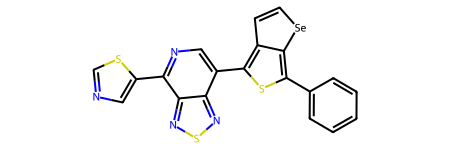

In [33]:

#  Convertir le SMILES en objet RDKit Mol
smiles = "c1ncc(s1)-c1ncc(-c2sc(-c3ccccc3)c3[se]ccc23)c2nsnc12"
mol = Chem.MolFromSmiles(smiles)

mol

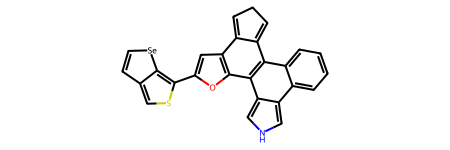

In [34]:
smile ='c1sc(-c2cc3c(o2)c2c4c[nH]cc4c4ccccc4c2c2=CCC=c32)c2[se]ccc12'
mol1 = Chem.MolFromSmiles(smile)
mol1

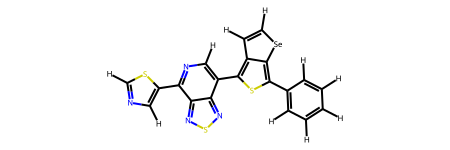

In [35]:

mol = Chem.AddHs(mol)
mol

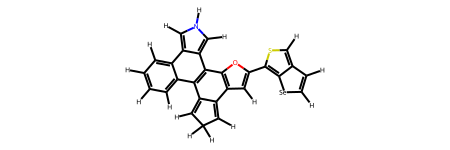

In [36]:
mol1 = Chem.AddHs(mol1)
mol1

In [37]:
#observer le nombres d'atomes de mon objet mol 
mol.GetNumAtoms()

38

In [38]:
#observer le nombres d'atomes de mon objet mol 
mol1.GetNumAtoms()

46

### Structure 3D

In [39]:
#observer la structure 3D
from rdkit.Chem import  AllChem
confid = AllChem.EmbedMolecule(mol)
mol
ml=mol

[18:50:50] UFFTYPER: Unrecognized atom type: Se2+2 (19)


[18:50:50] UFFTYPER: Unrecognized atom type: Se2+2 (27)


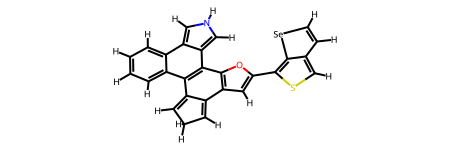

In [40]:

confid = AllChem.EmbedMolecule(mol1)
mol1


[18:50:51] UFFTYPER: Unrecognized atom type: Se2+2 (19)


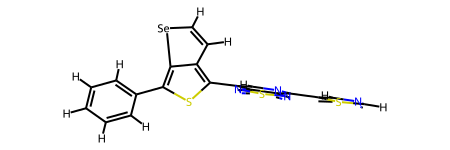

In [41]:
# Structure 3D optimale
AllChem.UFFOptimizeMolecule(mol)
mol

In [42]:
Chem.AllChem.AlignMol(mol ,ml)

0.0

###  Coordonnées déjà optimale  `mol`-`ml`=`0.0`

In [43]:
for i, atom in enumerate(mol.GetAtoms()):
        positions = mol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C 7.942769158650961 -0.9280382233109333 -0.27160901644198415
N 7.616847411148907 -0.7904418617486784 1.0314373887274453
C 6.283483760025405 -0.592594797940703 1.2141957281535756
C 5.521348858289656 -0.5696810763404142 0.046394267615297746
S 6.58027813508056 -0.8081357779318774 -1.2450484600605618
C 4.052062619745997 -0.37009625825975706 -0.00988586586119176
N 3.376226791486698 -0.1976013436852772 1.1618954079832928
C 2.029624521647748 -0.0038291809184797733 1.2248945751029785
C 1.2542265368528775 0.0318721239996535 0.055826364180903816
C -0.21165814160713456 0.21236289595518323 0.13244773865374698
S -1.332818186420837 -0.8027298506307722 -0.6029075328455642
C -2.7120524167021594 -0.023315332254944202 -0.026356374985341054
C -4.115013625793925 -0.4124000007810485 -0.30584654839074404
C -5.182760848907753 0.32732496197239763 0.2386182025685757
C -6.50626540217479 -0.03899443872902382 -0.024627035543610485
C -6.780234292399478 -1.144678684743077 -0.8319951252045962
C -5.731010904812824 -1

In [44]:
for i, atom in enumerate(mol1.GetAtoms()):
        positions = mol1.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C 6.571107325597707 -0.29272899505075684 -1.2055643909018119
S 5.126475035243177 -1.245922574229655 -1.6693394762374378
C 3.952649190831258 -0.21150767448434113 -0.7626554979934022
C 2.4930464981692055 -0.45523297472612845 -0.720810345057622
C 1.8380497856699525 -1.4889455288642877 -1.3578962244330595
C 0.5081295088589918 -1.3553784199892809 -1.0673297997404998
C 0.39517360404691554 -0.25999833874478 -0.2736434169905138
O 1.6078473824513138 0.2554928908059816 -0.08625691841278395
C -0.8595769405530628 0.0851111506681645 0.15520349603299824
C -0.8954016898217358 1.2214171891738432 0.9706266367648277
C 0.0668065515981581 2.0873057779264585 1.447343189255404
N -0.5512208539007184 3.017599455814867 2.2045588324946594
C -1.8843573354132712 2.744816987214758 2.207144014437964
C -2.1062951651007285 1.6260491654719291 1.4396213761470729
C -3.2430051508306046 0.9352241330163583 1.1125235584942608
C -4.439414608577486 1.422568121622371 1.6070021544596822
C -5.611701145448093 0.7874169531131969 1

### <a id='toc1_1_'></a>[ OPTIMIZE THE MOLECULE USING xTB ( or other semiempirical methods)](#toc0_)
<center><img src="./Graphics/xtb.jpeg" width="600">


In [45]:
mol_rdkit=mol
mol_rdkit1=mol1

In [46]:
from ase.build import molecule
from xtb.ase.calculator import XTB

In [47]:
mol.pbc=False
#newstrxtb.calc=XTB(method="GFN2-xTB")
# GFNFF is very fast. See here for other methods:
# https://xtb-python.readthedocs.io/en/latest/general-api.html#available-calculation-methods
mol.calc=XTB(method="GFNFF")

In [48]:
mol1.pbc=False
#newstrxtb.calc=XTB(method="GFN2-xTB")
# GFNFF is very fast. See here for other methods:
# https://xtb-python.readthedocs.io/en/latest/general-api.html#available-calculation-methods
mol1.calc=XTB(method="GFNFF")

In [49]:
mol_xtb =mol
mol_xtb1 =mol1

In [50]:
Chem.AllChem.AlignMol(mol_xtb ,mol_rdkit)

0.0

###  coordonnées déjà optimale  `mol_xtb`-`mol_rdkit`=0.0


In [51]:
mol_xyz = Chem.MolToXYZBlock(mol)

# supression de la premiere liugne (numbre d atomes) pour les donnees XYZ 
mol_xyz = '\n'.join(mol_xyz.strip().split('\n')[1:])
print(mol_xyz)


C      7.942769   -0.928038   -0.271609
N      7.616847   -0.790442    1.031437
C      6.283484   -0.592595    1.214196
C      5.521349   -0.569681    0.046394
S      6.580278   -0.808136   -1.245048
C      4.052063   -0.370096   -0.009886
N      3.376227   -0.197601    1.161895
C      2.029625   -0.003829    1.224895
C      1.254227    0.031872    0.055826
C     -0.211658    0.212363    0.132448
S     -1.332818   -0.802730   -0.602908
C     -2.712052   -0.023315   -0.026356
C     -4.115014   -0.412400   -0.305847
C     -5.182761    0.327325    0.238618
C     -6.506265   -0.038994   -0.024627
C     -6.780234   -1.144679   -0.831995
C     -5.731011   -1.886678   -1.378028
C     -4.405331   -1.525240   -1.118350
C     -2.310683    1.056562    0.756974
Se    -2.517845    3.088501    2.228163
C     -1.159519    3.142039    2.194589
C     -0.344689    2.240351    1.541097
C     -0.918719    1.188757    0.843554
C      1.907190   -0.153233   -1.169807
N      1.260734   -0.135152   -2.364943

In [52]:
mol_xyz1 = Chem.MolToXYZBlock(mol1)

# supression de la premiere liugne (numbre d atomes) pour les donnees XYZ 
mol_xyz1 = '\n'.join(mol_xyz1.strip().split('\n')[1:])
print(mol_xyz1)


C      6.571107   -0.292729   -1.205564
S      5.126475   -1.245923   -1.669339
C      3.952649   -0.211508   -0.762655
C      2.493046   -0.455233   -0.720810
C      1.838050   -1.488946   -1.357896
C      0.508130   -1.355378   -1.067330
C      0.395174   -0.259998   -0.273643
O      1.607847    0.255493   -0.086257
C     -0.859577    0.085111    0.155203
C     -0.895402    1.221417    0.970627
C      0.066807    2.087306    1.447343
N     -0.551221    3.017599    2.204559
C     -1.884357    2.744817    2.207144
C     -2.106295    1.626049    1.439621
C     -3.243005    0.935224    1.112524
C     -4.439415    1.422568    1.607002
C     -5.611701    0.787417    1.294101
C     -5.593575   -0.325150    0.493643
C     -4.386104   -0.826826   -0.012807
C     -3.210324   -0.205817    0.291936
C     -2.006701   -0.637117   -0.187549
C     -1.889405   -1.770921   -1.003006
C     -2.752010   -2.640429   -1.432596
C     -2.032369   -3.652728   -2.289747
C     -0.657235   -3.199684   -2.149073

### <a id='toc1_1_'></a>[ UTILISATION DE PYSCF pour le calcules des Energies Homo,Lumo et Gap ](#toc0_)

<!-- ![MolecularDimension.png](attachment:MolecularDimension.png) -->
![MolecularDimension.png](./Graphics/Pyscf.png)

In [53]:
#creation d'un objet pyscf
from pyscf import gto
mol = gto.Mole(
    atom=mol_xyz,
    charge=0,
    spin = 0,  # 2j == nelec_alpha - nelec_beta
    basis = "STO-3G",
    symmetry = True, # Allow the program to apply point group symmetry if possible
    unit = 'Angstrom',
    )
mol.build()

In [54]:
#creation d'un objet pyscf
from pyscf import gto
mol1 = gto.Mole(
    atom=mol_xyz1,
    charge=0,
    spin = 0,  # 2j == nelec_alpha - nelec_beta
    basis = "STO-3G",
    symmetry = True, # Allow the program to apply point group symmetry if possible
    unit = 'Angstrom',
    )
mol1.build()

In [55]:
print(f'Le nombre total d\'électrons est {mol.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol.basis}, est {mol.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol.energy_nuc()} Hartrees')

Le nombre total d'électrons est 240 et le nombre total d'électrons (alpha, béta) est (120, 120)
Le nombre d'orbitales atomiques, dans la base STO-3G, est 175
L'énergie nucléaire vaut 3289.0005522793426 Hartrees


In [56]:
print(f'Le nombre total d\'électrons est {mol1.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol1.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol1.basis}, est {mol1.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol1.energy_nuc()} Hartrees')

Le nombre total d'électrons est 242 et le nombre total d'électrons (alpha, béta) est (121, 121)
Le nombre d'orbitales atomiques, dans la base STO-3G, est 187
L'énergie nucléaire vaut 3515.2498372953582 Hartrees


In [57]:
import numpy as np

### Calcul   MF et DFT pour extraire les  E_Homo,E_lumo,le E_gap
 
#### <a id='toc1_4_'></a>[Calcul du champ moyen ou mean-field(MF)](#toc0_)
Les trois méthodes HF communément utilisées sont (voir la figure ci-dessous) :
![HF_Orb.png](./Graphics/HF_Orb.png)
<!-- <center>
 <img src='./Graphics/HF_Orb.png' width=400 /> 
</center> -->

1. **RHF (Restricted Hartree – Fock)** utiliśee pour des molécules à couches pleines ou fermées. Les spin-orbitales sont soit $\alpha$, soit $\beta$ et tous les orbitales sont doublement occupés par des spin-orbitales $\alpha$ et $\beta$;</br> 
2. **ROHF (Restricted Open-Shell Hartree–Fock)** utilisée pour des molécules à couches ouvertes où le nombre d'électrons les orbitales n'est pas le même. ROHF utilise autant que possible les orbitales doublement occupées et les orbitales une fois occupées par les électrons non-apariés;
3. **UHF (Unrestricted Hartree-Fock)** utilisée pour des molécules à couches ouvertes où le nombre d'électrons les orbitales n'est pas le même. Les orbitales UHF peuvent avoir avoir des spin $\alpha$ ou $\beta$, mais les orbitales $\alpha$ et $\beta$ peuvent avoir des composants spatiales différents.

Les équivalents DFT sont,

4. **RKS (Kohn-Sham restreint)**,
6. **ROKS (Restricted Open-Shell Kohn – Sham)**,
5. **UKS (Kohn-Sham sans restriction)**.

### Calcules DFT

In [58]:
try:
  import dftd4.pyscf as disp # Dispersion correction module
except:
  !mamba install dftd4 dftd4-python # utiliser conda à la place mamba au cas où...
  import dftd4.pyscf as disp # Dispersion correction module

In [59]:
md4 = disp.DFTD4Dispersion(mol, xc='B3LYP').run()
md4.kernel()


(array(-0.11349577),
 array([[ 3.15249426e-04, -3.85639360e-05,  7.18080298e-05],
        [ 4.18343575e-04, -4.35422487e-05,  1.93157308e-04],
        [ 6.63884217e-04, -9.50229204e-05, -2.23284895e-05],
        [ 6.68469966e-04, -7.79198289e-05,  2.56625232e-04],
        [ 1.47488194e-03, -2.05069483e-04,  6.48804684e-06],
        [ 6.56204343e-06,  5.59708951e-06,  2.98690711e-04],
        [ 1.72693562e-05, -1.63830030e-05,  7.54835985e-04],
        [ 3.20108034e-04, -1.77869505e-04,  6.22332018e-04],
        [ 2.78166100e-04, -1.99550397e-04,  1.92058520e-04],
        [-2.11757309e-04, -1.64377607e-04,  3.59859579e-05],
        [-1.08396858e-04,  4.42521068e-04,  7.58117920e-04],
        [ 4.68272496e-04, -3.25010628e-05,  1.43298255e-05],
        [-3.76807763e-04, -2.38759238e-04, -1.63824517e-04],
        [-7.71985545e-04,  1.69212905e-04,  1.30038497e-04],
        [-6.75163286e-04,  1.66838588e-04,  1.25080713e-04],
        [-5.48143240e-04, -1.50845381e-04, -1.08021562e-04],
   

In [ ]:
from pyscf import dft,scf
import time
start = time.time()
mdf=dft.RKS(mol, xc="B3LYP").run()
mdf_time = time.time() - start

/home/mvoto/anaconda3/envs/tartarus/lib/python3.8/site-packages/pyscf/dft/libxc.py:1102: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -4530.7251246253


In [ ]:
start = time.time()
mdf1=dft.RKS(mol1, xc="B3LYP").run()
mdf1_time = time.time() - start

converged SCF energy = -3921.80347412391


In [ ]:
start = time.time()
myhf = scf.RHF(mol).run()
myhf_time = time.time() - start 

converged SCF energy = -4521.5071713457


In [ ]:
start = time.time()
myhf1 = scf.RHF(mol1).run()
myhf1_time = time.time() - start 

converged SCF energy = -3912.69912231592


#### Extraction  du  E_Homo,E_lumo,le E_gap
### OM
<center><img src="./Graphics/Molecule_HOMO-LUMO_diagram.png" width="600">

In [ ]:
def find_homo_lumo(mf_pyscf, au2ev):
    """Function that returns the HOMO and LUMO index and the gap energy in eV

    Args:
        mf_pyscf (pyscf object): pyscf meam-field object of the molecule to be evaluated.
    """
    # Index of HOMO and LUMO
    lumo_idx = mf_pyscf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1

    # Calculate the gap Homo-LUMO
    E_HOMO = mf_pyscf.mo_energy[homo_idx]*au2ev
    E_LUMO = mf_pyscf.mo_energy[lumo_idx]*au2ev
    E_g = abs(E_HOMO - E_LUMO)

    return E_HOMO, E_LUMO, E_g

In [ ]:
from pyscf.data import nist
#conversion en eV
au2ev = nist.HARTREE2EV

In [ ]:
print(f"DFT Energy: {mdf.e_tot} Hartree\n")
print(f"Dipole Moment: {mdf.dip_moment()}\n")
print(f"Mulliken Charges: {mdf.mulliken_pop()}\n")

DFT Energy: -4530.725124625304 Hartree

Dipole moment(X, Y, Z, Debye): -3.12176, -2.52362,  0.93338
Dipole Moment: [-3.12176136 -2.52361924  0.9333753 ]

 ** Mulliken pop  **
pop of  0 C 1s            1.99136
pop of  0 C 2s            1.19043
pop of  0 C 2px           0.97353
pop of  0 C 2py           0.88629
pop of  0 C 2pz           1.09224
pop of  1 N 1s            1.99541
pop of  1 N 2s            1.66400
pop of  1 N 2px           1.25556
pop of  1 N 2py           1.21785
pop of  1 N 2pz           1.11518
pop of  2 C 1s            1.99095
pop of  2 C 2s            1.13072
pop of  2 C 2px           0.84566
pop of  2 C 2py           1.00278
pop of  2 C 2pz           1.04659
pop of  3 C 1s            1.99097
pop of  3 C 2s            1.18541
pop of  3 C 2px           0.93700
pop of  3 C 2py           0.93147
pop of  3 C 2pz           1.09290
pop of  4 S 1s            1.99987
pop of  4 S 2s            1.99517
pop of  4 S 3s            1.84123
pop of  4 S 2px           1.97585
pop of  4

pop of  6 N 2px           1.17358
pop of  6 N 2py           1.33546
pop of  6 N 2pz           1.09855
pop of  7 C 1s            1.99095
pop of  7 C 2s            1.13506
pop of  7 C 2px           0.85246
pop of  7 C 2py           1.00347
pop of  7 C 2pz           1.01467
pop of  8 C 1s            1.99051
pop of  8 C 2s            1.12696
pop of  8 C 2px           0.93544
pop of  8 C 2py           0.95104
pop of  8 C 2pz           1.00172
pop of  9 C 1s            1.99077
pop of  9 C 2s            1.16588
pop of  9 C 2px           0.91696
pop of  9 C 2py           0.98100
pop of  9 C 2pz           1.08132
pop of  10 S 1s           1.99987
pop of  10 S 2s           1.99514
pop of  10 S 3s           1.83585
pop of  10 S 2px          1.97489
pop of  10 S 2py          1.98511
pop of  10 S 2pz          1.98886
pop of  10 S 3px          0.93720
pop of  10 S 3py          1.39467
pop of  10 S 3pz          1.52285
pop of  11 C 1s           1.99092
pop of  11 C 2s           1.18489
pop of  11 C 2

In [ ]:
print(f"DFT Energy: {mdf1.e_tot} Hartree\n")
print(f"Dipole Moment: {mdf1.dip_moment()}\n")
print(f"Mulliken Charges: {mdf1.mulliken_pop()}\n")

DFT Energy: -3921.8034741239126 Hartree

Dipole moment(X, Y, Z, Debye):  2.74222, -0.62017,  0.57508
Dipole Moment: [ 2.74221619 -0.62017464  0.57507925]

 ** Mulliken pop  **
pop of  0 C 1s            1.99163
pop of  0 C 2s            1.24836
pop of  0 C 2px           0.93006
pop of  0 C 2py           0.93907
pop of  0 C 2pz           1.06832
pop of  1 S 1s            1.99989
pop of  1 S 2s            1.99581
pop of  1 S 3s            1.87117
pop of  1 S 2px           1.97582
pop of  1 S 2py           1.98339
pop of  1 S 2pz           1.99064


pop of  1 S 3px           0.97177
pop of  1 S 3py           1.31480
pop of  1 S 3pz           1.58307
pop of  2 C 1s            1.99079
pop of  2 C 2s            1.13577
pop of  2 C 2px           0.93522
pop of  2 C 2py           0.96331
pop of  2 C 2pz           1.10480
pop of  3 C 1s            1.99072
pop of  3 C 2s            1.06756
pop of  3 C 2px           0.86652
pop of  3 C 2py           0.88775
pop of  3 C 2pz           1.08022
pop of  4 C 1s            1.99061
pop of  4 C 2s            1.12940
pop of  4 C 2px           0.95192
pop of  4 C 2py           0.98922
pop of  4 C 2pz           1.05886
pop of  5 C 1s            1.99037
pop of  5 C 2s            1.08693
pop of  5 C 2px           0.96551
pop of  5 C 2py           0.97040
pop of  5 C 2pz           1.01551
pop of  6 C 1s            1.99072
pop of  6 C 2s            1.05428
pop of  6 C 2px           0.80735
pop of  6 C 2py           0.97260
pop of  6 C 2pz           1.07635
pop of  7 O 1s            1.99648
pop of  7 O 2s

### Extractition les  E_Homo,E_lumo,le E_gap dans le MF

In [ ]:
Eks_homo, Eks_lumo, Eks_g = find_homo_lumo(myhf,au2ev)
print(f'Homo Energy = {Eks_homo} eV, \nLumo Energy = {Eks_lumo} eV, \nGap Energy = {Eks_g} eV')

Homo Energy = -4.085417408516196 eV, 
Lumo Energy = 2.809364319821387 eV, 
Gap Energy = 6.894781728337582 eV


In [ ]:
Eks1_homo, Eks1_lumo, Eks1_g = find_homo_lumo(myhf1,au2ev)
print(f'Homo Energy = {Eks1_homo} eV, \nLumo Energy = {Eks1_lumo} eV, \nGap Energy = {Eks1_g} eV')

Homo Energy = -3.8148619734047413 eV, 
Lumo Energy = 3.9523037260605176 eV, 
Gap Energy = 7.767165699465259 eV


### Extractition les  E_Homo,E_lumo,le E_gap dans  DFT

In [ ]:
Edft_homo, Edft_lumo, Edft_g = find_homo_lumo(mdf,au2ev)
print(f'Homo Energy = {Edft_homo} eV, \nLumo Energy = {Edft_lumo} eV, \nGap Energy = {Edft_g} eV')

Homo Energy = -2.5751368046073306 eV, 
Lumo Energy = -0.8948482037242018 eV, 
Gap Energy = 1.6802886008831288 eV


In [ ]:
Edft1_homo, Edft1_lumo, Edft1_g = find_homo_lumo(mdf1,au2ev)
print(f'Homo Energy = {Edft1_homo} eV, \nLumo Energy = {Edft1_lumo} eV, \nGap Energy = {Edft1_g} eV')


Homo Energy = -2.530037287343902 eV, 
Lumo Energy = 0.4111644125691698 eV, 
Gap Energy = 2.941201699913072 eV


In [ ]:
print(f'Energy homo difference: {abs(Eks_homo-Edft_homo)*627.5} kcal/mol')
print(f'Energy lumo difference: {abs(Eks_lumo- Edft_lumo)*627.5} kcal/mol')
print(f'Energy gap difference: {abs(Eks_g-Edft_g)*627.5} kcal/mol')

Energy homo difference: 947.7010789528127 kcal/mol
Energy lumo difference: 2324.3933585248574 kcal/mol
Energy gap difference: 3272.0944374776695 kcal/mol


In [ ]:
print(f'Energy homo difference: {abs(Eks1_homo-Edft1_homo)*627.5} kcal/mol')
print(f'Energy lumo difference: {abs(Eks1_lumo- Edft1_lumo)*627.5} kcal/mol')
print(f'Energy gap difference: {abs(Eks1_g-Edft1_g)*627.5} kcal/mol')

Energy homo difference: 806.2274905031766 kcal/mol
Energy lumo difference: 2222.0649192158207 kcal/mol
Energy gap difference: 3028.2924097189975 kcal/mol


En analysant les résultats obtenus pour les  molécules, voici une conclusion générale que vous pourriez tirer :

* Le calcul DFT a révélé un écart significatif entre l'énergie du niveau d'orbitale moléculaire la plus élevée (LUMO) et celle du niveau d'orbitale moléculaire la plus basse (HOMO) et gap, avec une valeur de `2.4918762178680245 eV `et `1.7079074708899329 eV`. Ce gap élevé suggère une certaine stabilité de la molécule, avec une forte séparation entre les niveaux d'énergie des électrons impliqués dans les réactions chimiques.
* Ce choix se traduit par des différences d'énergies Homo de plus `850 kcal/mol`,dess différences d'énergies Lumo de plus `1895 kcal/mol`  ,des différences d'énergies gap de plus de  `2745kcal/mol` bien supérieure à [précision chimique](https://en.wikipedia.org/wiki/Computational_chemistry) (1 kcal/mol). 

 
## <a id='toc1_4_'></a>[MODEL DE SHARBER](#toc0_)
<div  class="alert alert-info">
Courbes densité de courant-tension (J/V) dans l’obscurité (ronds noirs) et sous illumination
(ronds blancs*) et caractéristiques principales des cellules solaires

</div>
<center><img src="./Graphics/Densite.png" width="600">


 ###  <a id='toc1_4_'></a>[Densité de courant de court-circuit(${J_{sc}}$)](#toc0_)


 <div  class="alert alert-info">
Dépend du nombre de photons absorbes par le matériau et donc de l’ ́épaisseur
de la couche active ainsi que de son spectre d’absorption et représente la quantité maximale courant électrique que cellule solaire organique peut générer dans des conditions de court-circuit

</div> 

\begin{equation}
\begin{split}

{J_{sc}}= Ae^{-E_{GAP}^2/B}\\.
\end{split}
\end{equation}
A et B représente la paramètres d'ajustements et déjà fixés dans TartarusA = 433.11633173034136 ,B = 2.3353220382662894, ${E_{GAP}}$  représente le énergies du Gap du donneurs correspondant a la différences de deux orbitales moléculaire Homo et Lumo sa valeur maximale dans les travaux CEP est estimée ${3.8 eV}$ et donc les gamme de valeurs normales se situe entre ${[0.8856;3.2627 ]eV}$

* Pour la representation des longueurs des opv ${\lambda(Å)}$ se calcule commment


\begin{equation}
\begin{split}


{\lambda(Å)} = \frac{12 398(eV)}{E_{GAP}(eV)}

\end{split}
\end{equation}

* ${\lambda(m)}$ sa gamme de valeurs  ${[3.7999203114*10^{-7},1.3999548329*10^{-6}]}(m)$  qui situe dans le domain du  Ultraviolet (UV) et le Visible(V)

###  <a id='toc1_4_'></a>[Tension de circuit ouvert(V_oc)](#toc0_)


 <div  class="alert alert-info">
Représentent la tension maximale qu’une cellule solaire peut appliquer a une charge externes

* Ecart entre la HOMO du composé donneur et la LUMO du composé accepteur

* Influencée par la recombinaison des charges qui ne peut être totalement évitée 

</div> 
        

\begin{equation}
\begin{split}




{V_{oc}}={\frac{1}{e}|E^{Do}HOMO|-|E^{AC}LUMO| -0.3}\\.

\end{split}
\end{equation}

* ${e}$ represente la charge de l'electrons 
* $E^{Do}HOMO$ represente l'énergie  Homo du donneur sa valeur maximale dans les travaux CEP est estimée ${-3,62 eV}$  et donc la gamme de valeurs normales se situe entre ${[-5.7 ; -4.5]eV}$
* $E^{AC}LUMO$ represente l'énergie Lumo de l'accepteur sa valeur maximale dans les travaux CEP est estimée ${-1,15 eV}$ et donc la gamme de valeurs normales se situe entre ${[-4 ; -3]eV}$
* -0.3 est la tension seuil en dessous du quelle il n'y'a separation des excitons

###  <a id='toc1_4_'></a>[Facteur de forme / facteur de remplissage  (FF) ](#toc0_)


 <div  class="alert alert-info">
 
* Informe sur la capacité du transport des charges dans le dispositif et sur la qualité de l’interface entre le donneur et l’accepteur estimé a 65 %

* Est proportionnelle a l'efficacite quantique externe lorsques des énergies photons absorbé >${E_{GAP}}$  
</div> 
        

\begin{equation}
\begin{split}
                 
{FF}= \frac{V_{oc}}{V_{oc}+a*{K_{b}}*T}
\end{split}
\end{equation}

* ${a}$ le coefficient d'absorption 
* $ {K_{b}}$ la constance de Boltzmann
* ${T}$ la temperature externes




###  <a id='toc1_4_'></a>[Efficacité de conversion (PCE)](#toc0_)


 <div  class="alert alert-info">
Rapport entre la puissance électrique produite par la cellule et la puissance lumineuse incidente  sa valeurs actuelles est estimée a 12% l'objectif est les 20%

</div> 
        

\begin{equation}
\begin{split}
                 
{PCE}={100} \frac{V_{oc}*FF*J_{sc}}{P_{in}}
\end{split}
\end{equation}
* puissance lumineuse incidente $ {P_{in}} $ 




### Définition du calcule (${jsc }$)

In [ ]:
def gaussian(x, A, B):
    return A * np.exp(-x** 2 / B)

In [ ]:
# Define parameters for Scharber model
A = 433.11633173034136
B = 2.3353220382662894
Pin = 900.1393292842149

### Condition de calibarge de Tartarus inspiree de CEP(Clearn Energy Projet Havard)

In [ ]:
 
HL_range_rest = Edft_g  # Good range for the HL gap: 0.8856-3.2627 
if 0.8856 <= HL_range_rest <= 3.2627: 
    HL_range_rest = 1.0
elif HL_range_rest < 0.8856: 
    HL_range_rest = 0.1144 + Edft_g
else: 
    HL_range_rest = 4.2627 - HL_range_rest
# # Compute calibrated homo and lumo levels
# homo_cal =  Edft_homo * 0.8051030400316004 + 2.5376777453204133
# lumo_cal = Edft_lumo * 0.8787863933542347 + 3.7912767464357200
# Eg_cal = abs(lumo_cal-abs(homo_cal))
Eg_cal=HL_range_rest

In [ ]:
homo_cal=Edft_homo
lumo_cal=Edft_lumo
Eg_cal=Edft_g
print(homo_cal)
print(lumo_cal)
print(Eg_cal)

-2.5751368046073306
-0.8948482037242018
1.6802886008831288


In [ ]:
HL_range_rest1 = Edft1_g  # Good range for the HL gap: 0.8856-3.2627 
if 0.8856 <= HL_range_rest1 <= 3.2627: 
    HL_range_rest1 = 1.0
elif HL_range_rest1 < 0.8856: 
    HL_range_rest1 = 0.1144 + Edft1_g
else: 
    HL_range_rest1 = 4.2627 - HL_range_rest1
    
# Compute calibrated homo and lumo levels
homo_cal1 = abs( Edft1_homo )* 0.8051030400316004 + 2.5376777453204133
lumo_cal1 =abs(Edft1_lumo) * 0.8787863933542347 + 3.7912767464357200
Eg_cal1 = HL_range_rest1

In [ ]:

# homo_cal1=Edft1_homo
# lumo_cal1=Edft1_lumo
# Eg_cal1=Edft1_g
print(homo_cal1)
print(lumo_cal1)
print(Eg_cal1)

4.574618456754292
4.152602437632994
1.0


### Scharber model objective 1: Optimization of donor for phenyl-C61-butyric acid methyl ester (PCBM) acceptor

#### Calcul Du PCE

In [ ]:
    voc_1 = (abs(homo_cal) - abs(-4.3)) - 0.3
    if voc_1 < 0.0:
        voc_1 = 0.0
    lumo_offset_1 = abs(lumo_cal) + 4.3
    if lumo_offset_1 < 0.3:
        pce_1 = 0.0
    else:
        jsc_1 = gaussian(Eg_cal, A, B)
        if jsc_1 > 415.22529811760637:
            jsc_1 = 415.22529811760637
        pce_1 = 100 * voc_1 * 0.65 * jsc_1 / Pin

    # Scharber model objective 2: Optimization of acceptor for poly[N-90-heptadecanyl-2,7-carbazole-alt-5,5-(40,70-di-2-thienyl-20,10,30-benzothiadiazole)] (PCDTBT) donor
    voc_2 = (abs(-5.5) - abs(lumo_cal1)) - 0.3
    if voc_2 < 0.0:
        voc_2 = 0.0
    lumo_offset_2 = 3.6 + lumo_cal1
    if lumo_offset_2 < 0.3:
        pce_2 = 0.0
    else:
        jsc_2 = gaussian(Eg_cal1 , A, B)
        if jsc_2 > 415.22529811760637:
            jsc_2 = 415.22529811760637
        pce_2 = 100 * voc_2 * 0.65 * jsc_2 / Pin

In [ ]:
pce_1

0.0

In [ ]:
pce_2

21.347746268508224

In [ ]:
    voc_3 = (abs(homo_cal1) - abs(-4.3)) - 0.3
    if voc_3 < 0.0:
        voc_3 = 0.0
    lumo_offset_3 = lumo_cal1 + 4.3
    if lumo_offset_3 < 0.3:
        pce_3 = 0.0
    else:
        jsc_3 = gaussian(Eg_cal1 , A, B)
        if jsc_3 > 415.22529811760637:
            jsc_3 = 415.22529811760637
        pce_3 = 100 * voc_3 * 0.65 * jsc_3 / Pin
Eg_cal1=HL_range_rest1
    # Scharber model objectiv= abs(lumo_cal1-abs(homo_cal1))e 2: Optimization of acceptor for poly[N-90-heptadecanyl-2,7-carbazole-alt-5,5-(40,70-di-2-thienyl-20,10,30-benzothiadiazole)] (PCDTBT) donor
    voc_4 = (abs(-5.5) - abs(lumo_cal)) - 0.3
    if voc_4 < 0.0:
        voc_4 = 0.0
    lumo_offset_4 = 3.6 + lumo_cal
    if lumo_offset_4 < 0.3:
        pce_4 = 0.0
    else:
        jsc_4 = gaussian(Eg_cal, A, B)
        if jsc_4 > 415.22529811760637:
            jsc_4 = 415.22529811760637
        pce_4 = 100 * voc_4 * 0.65 * jsc_4 / Pin

In [ ]:
pce_3

0.0

In [ ]:
pce_4

40.192132280375276

In [ ]:
    voc_5 = (abs(homo_cal1) - abs(lumo_cal)) - 0.3
    if voc_5 < 0.0:
        voc_5 = 0.0
    lumo_offset_5 = lumo_cal1 + 4.3
    if lumo_offset_5 < 0.3:
        pce_5 = 0.0
    else:
        jsc_5 = gaussian(Eg_cal1 , A, B)
        if jsc_5 > 415.22529811760637:
            jsc_5 = 415.22529811760637
        pce_5 = 100 * voc_5 * 0.65 * jsc_5 / Pin

    # Scharber model objective 2: Optimization of acceptor for poly[N-90-heptadecanyl-2,7-carbazole-alt-5,5-(40,70-di-2-thienyl-20,10,30-benzothiadiazole)] (PCDTBT) donor
    voc_6 = (abs(homo_cal) - abs(lumo_cal1)) - 0.3
    if voc_6 < 0.0:
        voc_6 = 0.0
    lumo_offset_6 = 3.6 + lumo_cal1
    if lumo_offset_6 < 0.3:
        pce_6 = 0.0
    else:
        jsc_6 = gaussian(Eg_cal, A, B)
        if jsc_6 > 415.22529811760637:
            jsc_6 = 415.22529811760637
        pce_6 = 100 * voc_6 * 0.65 * jsc_6 / Pin

In [ ]:
pce_5

68.88547424579247

In [ ]:
pce_6

0.0

#  Resultats
* Smiles 1 est un Donneurs  potentiels compatible avec Le PCDTBT et le smiles2 et un on Accpteurs pour le PCBM mais est un mauvais accepteurs pour les smiles 2; 
* Smiles 2 est un Accepteurs  potentiels compatible avec Le PCBM et le smiles1 mais est un mauvais  pour le PCDTBTet smiles 2  